# 1D CNN with Transformer

In [6]:
from TelescopeML.CNN_transformer_signal import *
from matplotlib import pyplot as plt

In [11]:
length = 1000
num_signals = 1000

cnn_transformer = CNNTransformerModel(length, num_signals)
X_train, X_val, X_test, y_train, y_val, y_test = cnn_transformer.preprocess_data()

input_shape = (length, 1)  # Length of the signal and number of channels
model = cnn_transformer.build_cnn_transformer(input_shape)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (700, 1000, 1)
Validation set shape: (150, 1000, 1)
Test set shape: (150, 1000, 1)


In [12]:
history = cnn_transformer.train_model(model, X_train, y_train, X_val, y_val, epochs=50)


Epoch 1/50
22/22 [==============================] - 4s 107ms/step - loss: 0.7937 - accuracy: 0.5114 - val_loss: 0.6802 - val_accuracy: 0.5800
Epoch 2/50
22/22 [==============================] - 2s 79ms/step - loss: 0.7168 - accuracy: 0.4971 - val_loss: 0.6799 - val_accuracy: 0.5800
Epoch 3/50
22/22 [==============================] - 2s 76ms/step - loss: 0.6947 - accuracy: 0.5000 - val_loss: 0.6809 - val_accuracy: 0.5800
Epoch 4/50
22/22 [==============================] - 2s 76ms/step - loss: 0.6962 - accuracy: 0.5214 - val_loss: 0.7002 - val_accuracy: 0.4200
Epoch 5/50
22/22 [==============================] - 2s 76ms/step - loss: 0.7040 - accuracy: 0.4986 - val_loss: 0.6978 - val_accuracy: 0.4200
Epoch 6/50
22/22 [==============================] - 2s 81ms/step - loss: 0.6934 - accuracy: 0.5114 - val_loss: 0.6831 - val_accuracy: 0.5800
Epoch 7/50
22/22 [==============================] - 2s 80ms/step - loss: 0.7020 - accuracy: 0.4857 - val_loss: 0.6780 - val_accuracy: 0.5800
Epoch 8/50
2

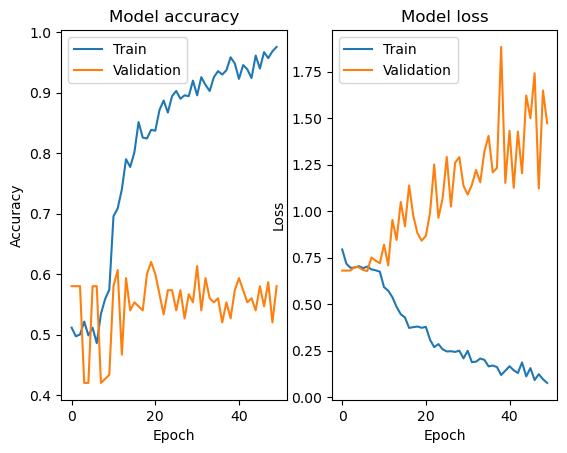

In [13]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [14]:
# Evaluate the model on the test set
cnn_transformer.evaluate_model(model, X_test, y_test)


5/5 [==============================] - 0s 17ms/step - loss: 1.6262 - accuracy: 0.4667
Test Loss: 1.6261574029922485
Test Accuracy: 0.46666666865348816


(1.6261574029922485, 0.46666666865348816)

In [11]:
cnn_transformer.save_model(model, 'cnn_transformer_model.keras')


Model saved to cnn_transformer_model.keras
